# Week 8-5 인공신경망 손글씨 인식


In [1]:
# 필요한 패키지 가져오기

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
# 하이퍼 파라미터 설정

batch_size = 128
num_classes = 10
epochs = 10

In [4]:
# 데이터 가져오기

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0]

5

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# 데이터 전처리

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
y_train.shape

(60000,)

In [14]:
y_test.shape

(10000,)

In [15]:
# 목표 변수 전처리 - one-hot 인코딩

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_train.shape

(60000, 10)

In [19]:
# 모형 구조 정의하기

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# 학습 정의하기

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [21]:
# 학습하기

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 0.2958 - accuracy: 0.9114 - val_loss: 0.1386 - val_accuracy: 0.9582
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.1199 - accuracy: 0.9634 - val_loss: 0.1046 - val_accuracy: 0.9672
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0798 - accuracy: 0.9748 - val_loss: 0.1044 - val_accuracy: 0.9693
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.0878 - val_accuracy: 0.9742
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0493 - accuracy: 0.9837 - val_loss: 0.0835 - val_accuracy: 0.9753
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0392 - accuracy: 0.9866 - val_loss: 0.0883 - val_accuracy: 0.9749
Epoch 7/10
329/329 [==============================] - 2s 8ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.1089 - val_accuracy: 0.9706
Epoch 

In [22]:
# 성능 평가하기

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07964164018630981
Test accuracy: 0.9779000282287598


In [23]:
#성능 그래프로 그리기

# graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

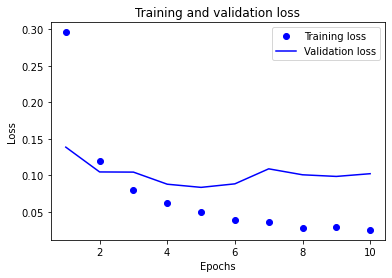

<Figure size 432x288 with 0 Axes>

In [24]:
epoch_range = range(1, len(acc) + 1)
epoch_range
plt.plot(epoch_range, loss, 'bo', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

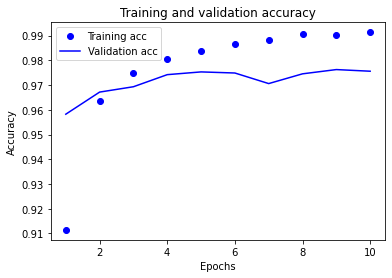

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(epoch_range, acc, 'bo', label='Training acc')
plt.plot(epoch_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()